<a href="https://colab.research.google.com/github/sumugowda/KNN_ALGORITHM/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# J N Sumanth
## ENG21CS0165



In [ ]:
# Import the Python modules and the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

water_df = pd.read_csv("https://s3-whjr-v2-prod-bucket.whjr.online/69e55114-dbd8-46c8-9c0a-4bdf19008d79.csv")
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
# Create a 2D numpy array of balls size and weights.
# Create an array consisting of category values.

balls_arr = np.array([[10, 11, 15, 12, 18, 20, 21, 22],
                      [150, 190, 190, 160, 200, 220, 230, 245]])
category_arr = np.array([0, 0, 0, 0, 1, 1, 1, 1])

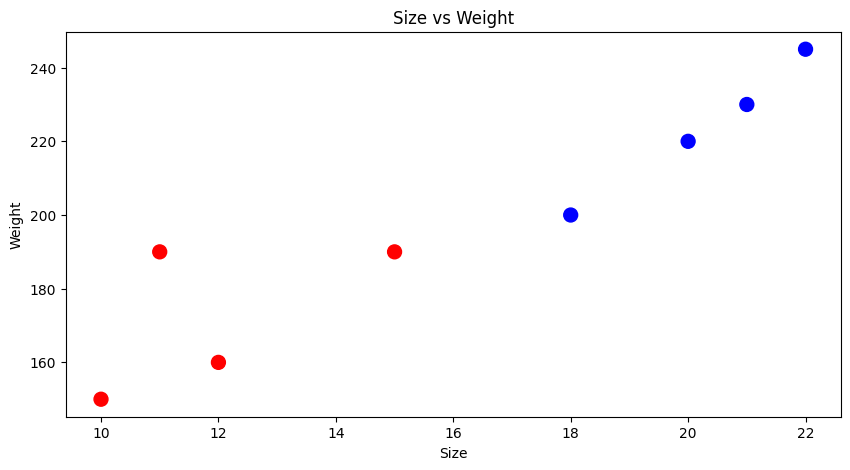

In [ ]:
# Create a scatter plot for size vs weight.
plt.figure(figsize = (10, 5))
color_arr = np.array(['r', 'b'])

plt.scatter(balls_arr[0], balls_arr[1], s = 100,  c = color_arr[category_arr])
plt.xlabel('Size')
plt.ylabel('Weight')
plt.title('Size vs Weight')
plt.show()

In [ ]:
# Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
# Check missing values using the 'isnull().sum()' function.
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [ ]:
# Handle missing value with median of features
water_df["ph"].fillna(value = water_df["ph"].median(), inplace = True)
water_df["Sulfate"].fillna(value = water_df["Sulfate"].median(), inplace = True)
water_df["Trihalomethanes"].fillna(value = water_df["Trihalomethanes"].median(), inplace = True)

In [ ]:
# Check the percentage of missing values
water_df.isnull().sum() * 100 / water_df.shape[0]

ph                 0.0
Hardness           0.0
Solids             0.0
Chloramines        0.0
Sulfate            0.0
Conductivity       0.0
Organic_carbon     0.0
Trihalomethanes    0.0
Turbidity          0.0
Potability         0.0
dtype: float64

<Axes: ylabel='count'>

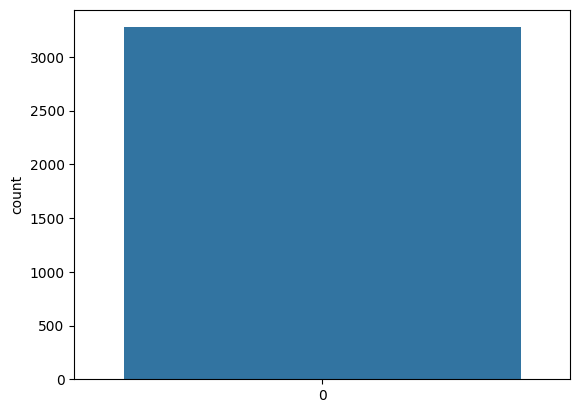

In [ ]:
# Create a countplot for target class.
sns.countplot(water_df['Potability'])

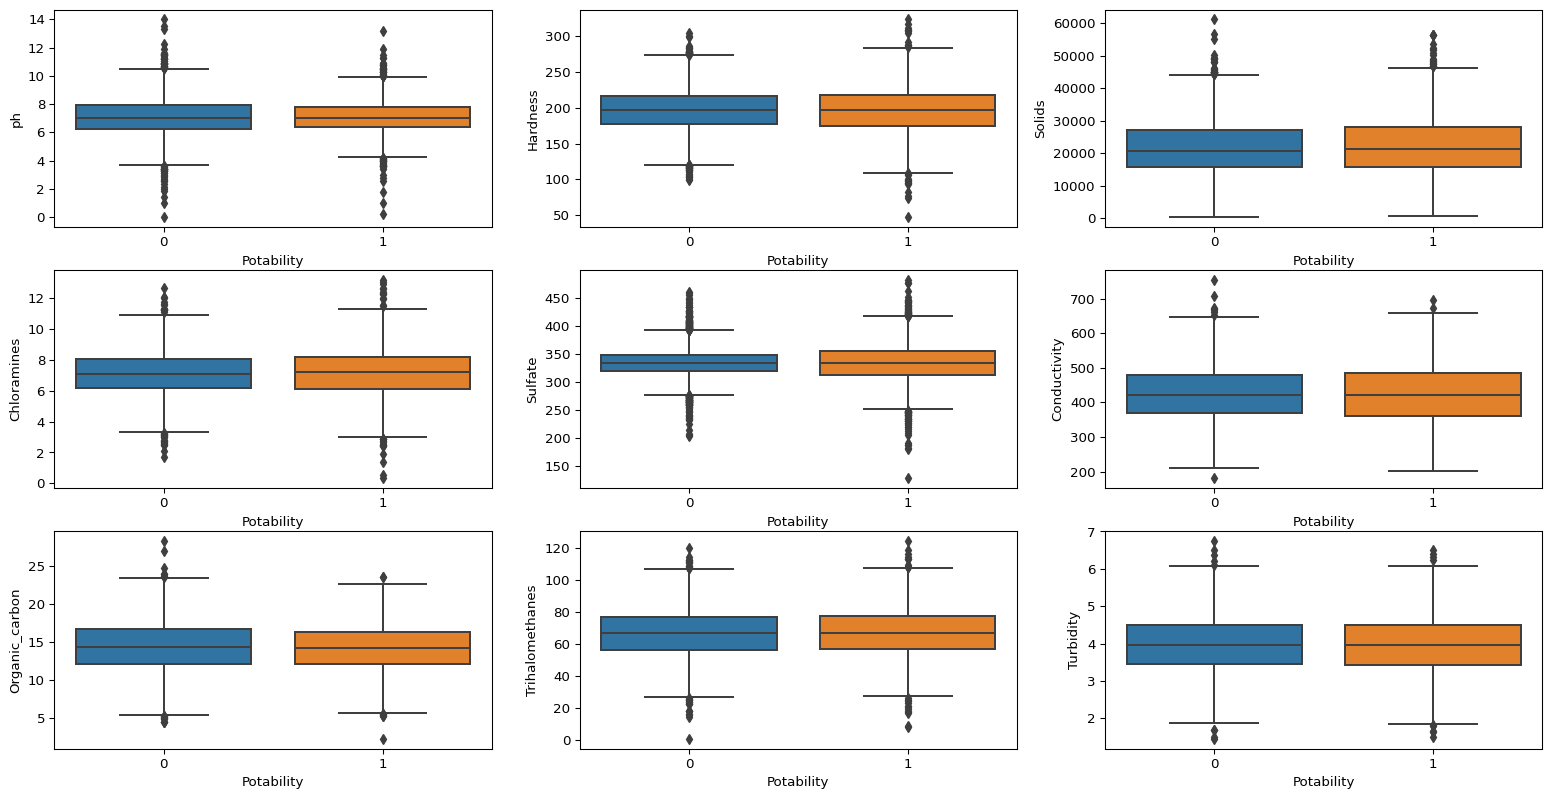

In [ ]:
# Create boxplots for 'water_df' columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10), dpi = 96, sharex = False)
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]    # Fetching the current column and all rows of that column.
    sns.boxplot(x = 'Potability', y = column, data = water_df, ax = axis[i, j])
    count = count + 1

plt.show()

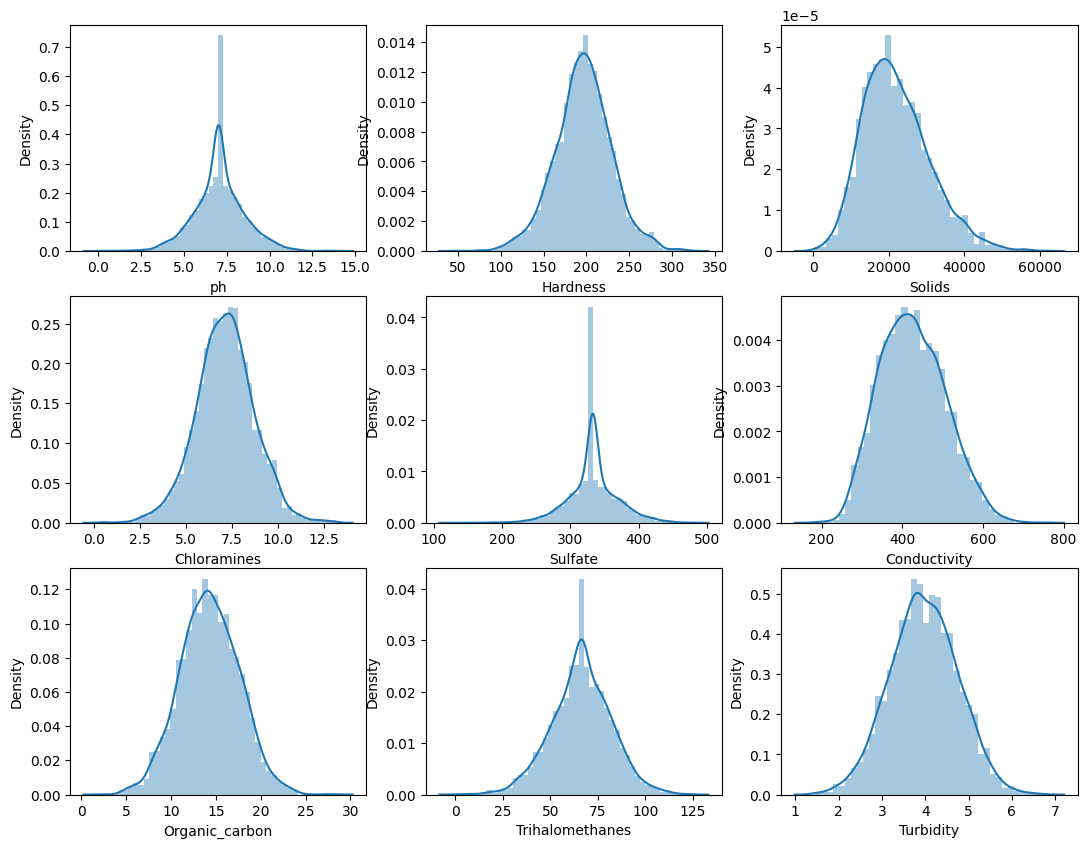

In [ ]:
# Create histogram for numeric columns using subplot.
fig, axis = plt.subplots(nrows = 3, ncols = 3, figsize = (13, 10), dpi = 100)
# As there are 9 columns, we created subplot having 3 rows and 3 columns.
count = 0

for i in range(0, 3):
  for j in range (0, 3):
    column = water_df.iloc[:, count]      # Fetching the current column and all rows of that column.

    sns.distplot(column, hist = True, ax = axis[i, j])
    count = count + 1

plt.show()

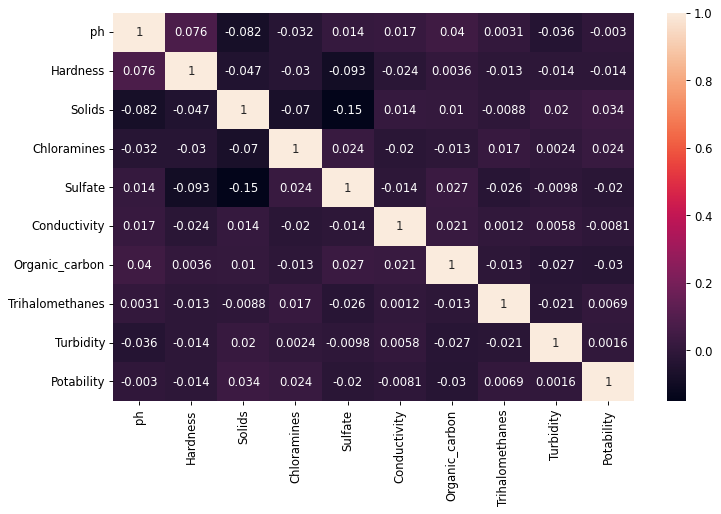

In [ ]:
# Check the correlation of features
corr_df = water_df.corr()
plt.figure(figsize = (10, 6), dpi = 84)
sns.heatmap(corr_df, annot = True)
plt.show()

In [ ]:
# Split the data into dependent and independent features
features_df = water_df.drop(['Potability'], axis = 1)
target_df = water_df['Potability']
features_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
# Normalise the column values.
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(features_df)
X_scaled = pd.DataFrame(scaled_features)
X_scaled.columns = features_df.columns
X_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786


In [ ]:
# Perform train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_df, test_size = 0.3,
                                                    random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2293, 9)
Shape of X_test: (983, 9)
Shape of y_train: (2293,)
Shape of y_test: (983,)


In [ ]:
#  Train kNN classifier model for 'k = 3'
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn3.score(X_train, y_train))
print("Test set accuracy:", knn3.score(X_test, y_test))

Train set accuracy: 0.8146532926297427
Test set accuracy: 0.612410986775178


In [ ]:
#  Train kNN classifier model for 'k = 7'
knn7 = KNeighborsClassifier(n_neighbors = 7)
knn7.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn7.score(X_train, y_train))
print("Test set accuracy:", knn7.score(X_test, y_test))

Train set accuracy: 0.7313563017880506
Test set accuracy: 0.6185147507629705


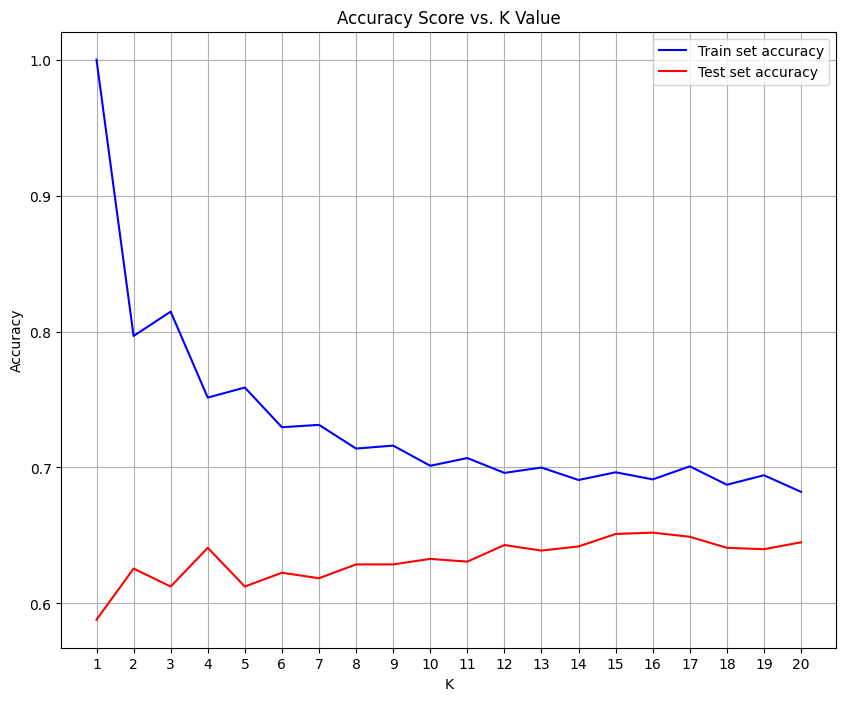

In [ ]:
# S2.1: Plot accuracy scores of train and test sets for 1 to 20 neighbours.

# Create two lists store the accuracy scores of train and test set
accuracy_train = []
accuracy_test= []

# Create a 'for' loop to get the accuracy scores of train and test set
for k in range(1, 21):

    # Perform KNeighborsClassifier with n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the train data in the model
    knn.fit(X_train, y_train)

    # Append the score into different lists
    accuracy_train.append(knn.score(X_train, y_train))
    accuracy_test.append(knn.score(X_test, y_test))

# Plot the accuracy scores of train and test sets
plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 21, 1))
plt.plot(range(1, 21), accuracy_train, color= 'blue', label = "Train set accuracy")
plt.plot(range(1, 21), accuracy_test, color= 'red', label = "Test set accuracy")
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Train kNN classifier model for 'k = 15'
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn15.fit(X_train, y_train)

# Call the 'score()' function to check the accuracy score of the train set and test set.
print("Train set accuracy:", knn15.score(X_train, y_train))
print("Test set accuracy:", knn15.score(X_test, y_test))

Train set accuracy: 0.6964675098124727
Test set accuracy: 0.6510681586978637


In [ ]:
#  Display the precision, recall and f1-score values.
from sklearn.metrics import classification_report
print(classification_report(y_test, knn15.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       600
           1       0.62      0.28      0.38       383

    accuracy                           0.65       983
   macro avg       0.64      0.58      0.57       983
weighted avg       0.64      0.65      0.61       983



In [ ]:
#  Determine the percentage of samples belonging to class '0' and class '1' in 'y_train'.
y_train.value_counts(normalize = True) * 100

0    60.968164
1    39.031836
Name: Potability, dtype: float64

In [ ]:
# Count the number of class 0 and 1 samples in train set before undersampling.
y_train.value_counts()

0    1398
1     895
Name: Potability, dtype: int64

In [ ]:
#  Perform random undersampling on train set
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 42)
X_rus_train, y_rus_train = rus.fit_resample(X_train, y_train) # fit predictor and target variable

In [ ]:
# Check the type and shapes of the 'X_rus_train' and 'y_rus_train' datasets.
print(type(X_rus_train), X_rus_train.shape)
print(type(y_rus_train), y_rus_train.shape)

<class 'pandas.core.frame.DataFrame'> (1790, 9)
<class 'pandas.core.series.Series'> (1790,)


In [ ]:
# Find the number of occurrences of class '0' and class '1' values in 'y_rus_train'
y_rus_train.value_counts()

0    895
1    895
Name: Potability, dtype: int64

In [ ]:
#  Train kNN classifier model again for 'k = 15' with undersampled train set.
from sklearn.neighbors import KNeighborsClassifier
knn_rus= KNeighborsClassifier(n_neighbors = 15)
knn_rus.fit(X_rus_train, y_rus_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_rus.score(X_rus_train, y_rus_train))
print("Test set accuracy:", knn_rus.score(X_test, y_test))

Train set accuracy: 0.6849162011173184
Test set accuracy: 0.624618514750763


In [ ]:
# Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_rus.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70       600
           1       0.52      0.50      0.51       383

    accuracy                           0.62       983
   macro avg       0.60      0.60      0.60       983
weighted avg       0.62      0.62      0.62       983



In [ ]:
#  Apply the 'SMOTE()' function to balance the training data.

# Import the 'SMOTE' class from the 'imblearn.over_sampling' module.
from imblearn.over_sampling import SMOTE

# Initialise the 'SMOTE()' constructor.
smote = SMOTE(random_state = 42)

# Call the 'fit_resample()' function with 'X_train' and 'y_train' as inputs.
X_sm_train, y_sm_train = smote.fit_resample(X_train, y_train)

In [ ]:
#  Find the number of occurrences of class '0' and class '1' values in 'y_sm_train'
y_sm_train.value_counts()

1    1398
0    1398
Name: Potability, dtype: int64

In [ ]:
#  Train kNN classifier model for 'k = 15'
# Build the model.
knn_sm = KNeighborsClassifier(n_neighbors = 15)

# Call the 'fit()' function.
knn_sm.fit(X_sm_train, y_sm_train)

# Call the 'score()' function to check the accuracy score of the train and test set.
print("Train set accuracy:", knn_sm.score(X_rus_train, y_rus_train))
print("Test set accuracy:", knn_sm.score(X_test, y_test))

Train set accuracy: 0.6932960893854748
Test set accuracy: 0.5859613428280773


In [ ]:
#  Display the precision, recall and f1-score values.
print(classification_report(y_test, knn_sm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64       600
           1       0.47      0.54      0.50       383

    accuracy                           0.59       983
   macro avg       0.57      0.58      0.57       983
weighted avg       0.60      0.59      0.59       983

